In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
import os
import math

import numpy
import pandas
import librosa
import soundfile

from matplotlib import pyplot as plt
import librosa.display

from brewaed import utils, labels, beerbubble
import brewaed



In [3]:
def load_dataset(path):
    df = pandas.read_csv(path)
    df = df.set_index('id')
    
    return df

data_dir = '../data'
files_path = os.path.join(data_dir, 'files.csv')

files = load_dataset(files_path)
files['path'] = os.path.join(data_dir, 'audio') + os.path.sep + files.filename 
files

,youtube_url,filename,brews,path
id,,,,
MN0Mg1uyznU,https://www.youtube.com/watch?v=MN0Mg1uyznU,ASMR _ Homebrewing Airlock Symphony 🍺🎼 Soothin...,3,../data/audio/ASMR _ Homebrewing Airlock Symph...
by0e-EkAsOE,https://www.youtube.com/watch?v=by0e-EkAsOE,One hour of apple wine airlock bubbling-by0e-E...,1,../data/audio/One hour of apple wine airlock b...
q2srYoC3FOo,https://www.youtube.com/watch?v=q2srYoC3FOo,Bubbling airlock on pear cider-q2srYoC3FOo.m4a,1,../data/audio/Bubbling airlock on pear cider-q...
p0jtxp5nWms,https://www.youtube.com/watch?v=p0jtxp5nWms,Watch an Airlock Bubbling During Mead Fermenta...,1,../data/audio/Watch an Airlock Bubbling During...
f3bLQLT48Yc,https://www.youtube.com/watch?v=f3bLQLT48Yc,Ginger beer brewing day nine-f3bLQLT48Yc.m4a,1,../data/audio/Ginger beer brewing day nine-f3b...
WHlSNkq29k4,https://www.youtube.com/watch?v=WHlSNkq29k4,Airlock during fermentation.-WHlSNkq29k4.m4a,1,../data/audio/Airlock during fermentation.-WHl...
51ytpDZj8v4,https://www.youtube.com/watch?v=51ytpDZj8v4,Elderflower Airlock-51ytpDZj8v4.m4a,1,../data/audio/Elderflower Airlock-51ytpDZj8v4.m4a
gQFo3Lg2MAc,https://www.youtube.com/watch?v=gQFo3Lg2MAc,Airlock bubbler_Home brewing-gQFo3Lg2MAc.m4a,1,../data/audio/Airlock bubbler_Home brewing-gQF...
po2u_qI7-us,https://www.youtube.com/watch?v=po2u_qI7-us,S-Style Beer_Wine Air Lock Bubbling-po2u_qI7-u...,1,../data/audio/S-Style Beer_Wine Air Lock Bubbl...


In [4]:
def get_id_from_labelpath(p):
    f = os.path.basename(p)
    prefix, id = f.split('.')
    assert prefix == 'labels', prefix
    return id

def load_labels(label_dir):

    paths = [ os.path.join(label_dir, f) for f in os.listdir(label_dir) ]

    ids = list(map(get_id_from_labelpath, paths))
    
    files = pandas.DataFrame({
        'path': paths,
        'id': ids,
    }).set_index('id')
    
    labels = files.groupby(by='id').apply(lambda r: brewaed.labels.read(r.path.iloc[0]))
    
    return labels

label_dir = os.path.join(data_dir, 'labels')
labels = load_labels(label_dir)
labels
#brewaed.labels.read(ll.path.iloc[0])




start     end annotation
id                                       
51ytpDZj8v4 0    0.640   1.024          p
            1    2.048   2.432          p
            2    3.328   3.712          p
            3    4.736   5.120          p
            4    6.144   6.400          p
...                ...     ...        ...
q2srYoC3FOo 9   37.376  37.760          p
            10  44.416  44.672          p
            11  51.072  51.328          p
            12  56.832  56.960          n
            13  57.600  57.984          p

[867 rows x 3 columns]

In [5]:
def load_features_path(path, hop_length=1024, sr=16000, start=0.0, end=1*60.0):
    feature_fft = utils.next_power_of_2(feature_hop*2)
    
    audio, sr = librosa.load(path, sr=16000, offset=start, duration=end-start)
    ff = librosa.feature.mfcc(audio, sr=sr, hop_length=feature_hop, n_fft=feature_fft, n_mfcc=13) 
    delta = librosa.feature.delta(ff, width=7, order=1)
    ff = numpy.concatenate([ff, delta], axis=0)
    ff = ff.T
    
    return ff

samplerate=16000
window_length=0.256/2
feature_hop = int(window_length*samplerate)
    
labeled_files = files.loc[labels.reset_index().id.unique()]
audio_features = labeled_files.path.apply(load_features_path, hop_length=feature_hop, sr=samplerate) 


/home/jon/.local/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jon/.local/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jon/.local/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jon/.local/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jon/.local/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jon/.local/lib

In [6]:
def label_frames(labels, frames, hop_length, sr=16000):
    #print(frames.shape)
    
    times = librosa.frames_to_time(numpy.arange(frames.shape[0]), hop_length=hop_length, sr=sr)
    #print(times.shape)
    
    def find_matching(times, start, end):
        s = numpy.argmin(numpy.abs(times - start))
        e = numpy.argmin(numpy.abs(times - end))
        return s, e
    
    out = numpy.empty(shape=times.shape, dtype='str')
    for start, end, lab in zip(labels.start, labels.end, labels.annotation):
        s, e = find_matching(times, start=start, end=end)
        #print(start, end, e-s)
        for i in range(s, e):
            out[i] = lab
   
    #print(labels.shape)
    #print(times[0], times[-1])
    #print(out)
    
    return out

def label_file(id, frames):
    ll = label_frames(labels.loc[id], frames, hop_length=feature_hop)
    s = pandas.Series([ll], index=[id])
    return s
    
out = []
for id, df in audio_features.groupby('id'):
    out.append(label_file(id, df[0]))
out = pandas.concat(out)
    
out
#for o in out:
#    print(o)

51ytpDZj8v4    [, , , , , p, p, p, , , , , , , , , p, p, p, ,...
MN0Mg1uyznU    [, , , , p, p, p, p, , , , , p, , p, , , , , ,...
WHlSNkq29k4    [, , , , , , p, p, p, , , , , , , , , p, p, p,...
ZPmEByu-4xQ    [, p, , p, p, p, p, , p, , p, p, , , p, p, , p...
by0e-EkAsOE    [, , , , p, p, p, , , , , , , , , , , , , , , ...
f3bLQLT48Yc    [n, , , , , , , , , , p, , , , p, , n, n, p, ,...
gQFo3Lg2MAc    [n, n, , , , , , , , p, p, , , , , , , p, p, ,...
p0jtxp5nWms    [, , , , , , , p, , , , , , , p, , , , , , , p...
po2u_qI7-us    [, , , , , , , , , , , , , , , , , , , , , , ,...
q2srYoC3FOo    [, , , , , , , , , , , , , , , , , , , , , , ,...
dtype: object

In [7]:
def to_windows(labels, features, hop_length, sr=16000):
    
    labels = labels.rename('label')
    features = features.rename('feature')
    print(features.shape)
    
    def compute_time(f):
        times = librosa.frames_to_time(numpy.arange(f.shape[0]), hop_length=hop_length, sr=sr)
        return times
    
    times = pandas.Series([ compute_time(f) for f in features ], name='time', index=features.index)
    merged = pandas.merge(labels, features, right_index=True, left_index=True)
    merged = pandas.merge(merged, times, right_index=True, left_index=True)

    merged.index = merged.index.rename('file')
    #merged = merged.reset_index()
    
    dfs = []
    
    for idx, row in merged.iterrows():
        out = {}
        for column in merged.columns:
            out[column] = [ v for v in row[column] ]
            
        length = len(out[column])
        out['window'] = numpy.arange(length)
        out[merged.index.name] = [idx] * length

        dfs.append(pandas.DataFrame(out))
        
    df = pandas.concat(dfs)
    
    return df

windows = to_windows(out, audio_features, sr=samplerate, hop_length=feature_hop)
windows = windows.set_index(['file', 'window'])
windows

(10,)


label                                            feature  \
file        window                                                            
51ytpDZj8v4 0             [-571.7759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
            1             [-487.71875, 61.570457, 15.359638, 6.1677732, ...   
            2             [-471.65775, 61.684418, 13.509034, 4.8203077, ...   
            3             [-474.25543, 60.927444, 13.533315, 6.46927, -2...   
            4             [-470.68253, 64.60702, 16.254025, 6.2774935, -...   
...                  ...                                                ...   
q2srYoC3FOo 464           [-369.83347, 45.369884, 2.038496, 11.981861, -...   
            465           [-374.00208, 45.814762, 2.6812298, 15.024856, ...   
            466           [-373.18817, 47.013695, 7.4942636, 12.607885, ...   
            467           [-372.77405, 44.372395, 1.8171508, 13.644563, ...   
            468           [-376.6818, 42.069252, 5.182604, 13.706591, 0....   

                      time  
file        window          
51ytpDZj8v4 0        0.000  
            1        0.128  
            2        0.256  
            3        0.384  
            4        0.512  
...                    ...  
q2srYoC3FOo 464     59.392  
            465     59.520  
            466     59.648  
            467     59.776  
            468     59.904  

[4358 rows x 3 columns]

In [8]:
import sklearn.model_selection
splitter = sklearn.model_selection.GroupKFold(n_splits=4)
folds = list(splitter.split(windows, groups=windows.reset_index().file))
for fold_no, (train_idx, test_idx) in enumerate(folds):
    print(fold_no, len(train_idx), len(test_idx))


train, test = windows.iloc[folds[0][0]], windows.iloc[folds[0][1]]
#train = windows.iloc[train]
#test = windows.iloc[test]



0 2973 1385
1 3261 1097
2 3420 938
3 3420 938


In [12]:

def build_model():
    
    import sklearn.pipeline
    import sklearn.preprocessing
    import sklearn.linear_model
    import sklearn.svm
    import sklearn.neighbors
    from sklearn.compose import make_column_transformer
    from sklearn.compose import make_column_selector

    model = sklearn.pipeline.Pipeline([
        ('scale', sklearn.preprocessing.StandardScaler()),
        ('classifier', sklearn.linear_model.LogisticRegression()),
    ])

    return model

def get_features(df):
    return numpy.array([f for f in df.feature])

m = build_model()
m.fit(get_features(train), train.label == 'p')

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', LogisticRegression())])

In [14]:
def predict(model, windows):
    
    X = get_features(windows)
    Y = m.predict_proba(X)[:,1]
    
    pred = pandas.DataFrame({
      'probability': Y,
    }, index=windows.index)

    pred = pred.merge(windows, left_index=True, right_index=True)
    
    return pred

predict(m, train)
    

probability label  \
file        window                      
51ytpDZj8v4 0          0.002581         
            1          0.047297         
            2          0.032247         
            3          0.036736         
            4          0.097956         
...                         ...   ...   
po2u_qI7-us 154        0.052121         
            155        0.020778         
            156        0.018318         
            157        0.023193         
            158        0.030290         

                                                              feature    time  
file        window                                                             
51ytpDZj8v4 0       [-571.7759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   0.000  
            1       [-487.71875, 61.570457, 15.359638, 6.1677732, ...   0.128  
            2       [-471.65775, 61.684418, 13.509034, 4.8203077, ...   0.256  
            3       [-474.25543, 60.927444, 13.533315, 6.46927, -2...   0.384  
            4       [-470.68253, 64.60702, 16.254025, 6.2774935, -...   0.512  
...                                                               ...     ...  
po2u_qI7-us 154     [-426.9177, 160.44193, -24.821033, 70.5, -14.2...  19.712  
            155     [-430.0458, 158.84532, -22.269205, 66.77347, -...  19.840  
            156     [-429.81146, 159.98785, -26.23236, 71.10466, -...  19.968  
            157     [-421.25488, 161.47495, -21.535835, 66.49953, ...  20.096  
            158     [-422.2667, 167.44104, -25.575823, 71.91357, -...  20.224  

[2973 rows x 4 columns]

In [18]:
import sklearn.metrics
#Y_pred = m.predict(get_features(train))
#sklearn.metrics.f1_score(Y_pred, train.label == 'p')

sklearn.metrics.f1_score(predict(m, test).probability > 0.1, test.label == 'p')

0.5395996518711923

In [19]:
# TODO: plot PR / ROC curves

pred = predict(m, train)
pred

probability label  \
file        window                      
51ytpDZj8v4 0          0.002581         
            1          0.047297         
            2          0.032247         
            3          0.036736         
            4          0.097956         
...                         ...   ...   
po2u_qI7-us 154        0.052121         
            155        0.020778         
            156        0.018318         
            157        0.023193         
            158        0.030290         

                                                              feature    time  
file        window                                                             
51ytpDZj8v4 0       [-571.7759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   0.000  
            1       [-487.71875, 61.570457, 15.359638, 6.1677732, ...   0.128  
            2       [-471.65775, 61.684418, 13.509034, 4.8203077, ...   0.256  
            3       [-474.25543, 60.927444, 13.533315, 6.46927, -2...   0.384  
            4       [-470.68253, 64.60702, 16.254025, 6.2774935, -...   0.512  
...                                                               ...     ...  
po2u_qI7-us 154     [-426.9177, 160.44193, -24.821033, 70.5, -14.2...  19.712  
            155     [-430.0458, 158.84532, -22.269205, 66.77347, -...  19.840  
            156     [-429.81146, 159.98785, -26.23236, 71.10466, -...  19.968  
            157     [-421.25488, 161.47495, -21.535835, 66.49953, ...  20.096  
            158     [-422.2667, 167.44104, -25.575823, 71.91357, -...  20.224  

[2973 rows x 4 columns]

In [20]:
def get_events(pred):
    pred = pred.copy()
    sparse, dense = utils.mark_onoff(pred.set_index('time').probability, on_threshold=0.6, off_threshold=0.4)
    out = sparse
    
    return out

all_preds = predict(m, windows)
events = all_preds.reset_index().groupby('file').apply(get_events)
events

file               
51ytpDZj8v4  0.640     1
             0.896     0
             2.048     1
             2.432     0
             3.328     1
                      ..
po2u_qI7-us  15.616    0
             19.200    1
             19.328    0
q2srYoC3FOo  4.224     1
             4.352     0
Length: 476, dtype: int64

In [21]:
def n_events(df):
    return numpy.count_nonzero(df)
events.groupby('file').apply(n_events)

file
51ytpDZj8v4    43
MN0Mg1uyznU    54
WHlSNkq29k4    32
ZPmEByu-4xQ     8
by0e-EkAsOE    23
f3bLQLT48Yc    29
gQFo3Lg2MAc    47
po2u_qI7-us     2
q2srYoC3FOo     1
dtype: int64

In [22]:
labels[labels.annotation == 'p'].reset_index().groupby('id').count()

,level_1,start,end,annotation
id,,,,
51ytpDZj8v4,43,43,43,43
MN0Mg1uyznU,96,96,96,96
WHlSNkq29k4,36,36,36,36
ZPmEByu-4xQ,364,364,364,364
by0e-EkAsOE,23,23,23,23
f3bLQLT48Yc,104,104,104,104
gQFo3Lg2MAc,48,48,48,48
p0jtxp5nWms,10,10,10,10
po2u_qI7-us,5,5,5,5


In [23]:
def ggg(df):
    df = df[df == 1].reset_index()    
    t = df['level_1']
    
    return t.diff().dropna().rename('diff')
    
p = events.groupby('file').apply(ggg)

In [24]:
def gg(df):
    return df['start'].diff().dropna().rename('diff')

h = labels[labels.annotation == 'p'].reset_index().groupby('id').apply(gg)
import seaborn


<AxesSubplot:xlabel='diff', ylabel='Count'>

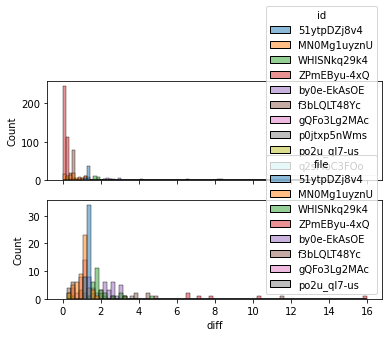

In [25]:
# TODO: make plots use one ax per file, overlay predictions with labels
fig, axs = plt.subplots(2, sharex=True)
seaborn.histplot(ax=axs[0], data=h.reset_index(), x='diff', hue='id')
seaborn.histplot(ax=axs[1], data=p.reset_index(), x='diff', hue='file')

In [26]:
# TODO: compute metrics on BPM 

def get_bpm(diffs):
    return 60.0 / diffs.median()
    
h.groupby('id').apply(get_bpm)

id
51ytpDZj8v4     42.613636
MN0Mg1uyznU     96.216911
WHlSNkq29k4     34.228094
ZPmEByu-4xQ    375.000000
by0e-EkAsOE     23.437500
f3bLQLT48Yc    121.006044
gQFo3Lg2MAc     50.379526
p0jtxp5nWms      7.284639
po2u_qI7-us     14.962405
q2srYoC3FOo      9.014423
Name: diff, dtype: float64

In [27]:
p.groupby('file').apply(get_bpm)

file
51ytpDZj8v4    42.613636
MN0Mg1uyznU    52.083333
WHlSNkq29k4    33.482143
ZPmEByu-4xQ     8.223684
by0e-EkAsOE    23.437500
f3bLQLT48Yc    49.342105
gQFo3Lg2MAc    49.342105
po2u_qI7-us    16.163793
Name: diff, dtype: float64